![](https://storage.googleapis.com/palma/mandau/pxHX_449AhqpVUhOdhQX.jpeg)
#   Pengantar 
Kumpulan data ini berisi informasi historis mengenai pergerakan harga saham PT Bank Rakyat Indonesia (Persero) Tbk (BBRI) yang tercatat di Bursa Efek Indonesia (BEI). Data ini mencakup periode dari tanggal 10 November 2003 hingga 15 Maret 2011. Setiap baris dalam dataset mewakili data perdagangan saham BBRI pada hari tertentu, termasuk harga pembukaan, harga penutupan, harga tertinggi, harga terendah, serta volume perdagangan saham pada hari tersebut.

Dataset ini dapat digunakan untuk analisis teknis, prediksi harga saham, atau studi pasar saham secara umum. Data ini juga dapat membantu investor atau analis dalam memahami pola pergerakan harga saham BBRI selama periode tertentu.

# Information Colomn
- **Date** :Tanggal perdagangan saham BBRI. Format tanggal yang digunakan adalah YYYY-MM-DD. 
- **Close** : Harga penutupan saham BBRI pada hari tersebut. Harga penutupan adalah harga terakhir saham diperdagangkan pada hari itu.
- **High** : Harga tertinggi saham BBRI yang tercapai selama sesi perdagangan pada hari tersebut.
- **Low**:Harga terendah saham BBRI yang tercapai selama sesi perdagangan pada hari tersebut.
- **Open**:Harga pembukaan saham BBRI pada hari tersebut. Harga pembukaan adalah harga pertama saham diperdagangkan pada hari itu.
- **Volume**:Jumlah saham BBRI yang diperdagangkan pada hari tersebut. Volume perdagangan mencerminkan aktivitas pasar dan likuiditas saham.


Import Modules

In [1]:
# import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

# Gathering Data
Kita bisa masuk ke tahap gathering data. Pada tahap ini, kita akan mengumpulkan semua data yang dibutuhkan. 

In [2]:
# # load dataset
stock_data = pd.read_csv('BBRI.JK.NEW.csv')


In [3]:
# Mengonversi kolom 'date' menjadi tipe datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [4]:
# Jika Anda ingin mengatur kolom 'date' sebagai indeks
stock_data.set_index('Date', inplace=True)


In [5]:
stock_data.head()#Menampilkan 5 baris pertama

,Close,High,Low,Open,Volume
Date,,,,,
2003-11-10,42.323605,47.749708,41.238383,45.579265,5658651738
2003-11-11,43.408825,43.408825,41.238385,42.323607,3232466332
2003-11-12,45.579269,45.579269,42.323608,42.323608,2203244555
2003-11-13,45.579269,45.579269,44.494048,45.579269,1309077610
2003-11-14,45.579269,45.579269,43.408826,45.579269,1897824280


In [6]:
stock_data.tail()#Menampilkan 5 baris terakhir

,Close,High,Low,Open,Volume
Date,,,,,
2025-03-10,3760.0,3810.0,3730.0,3790.0,232192200
2025-03-11,3790.0,3790.0,3660.0,3700.0,273961800
2025-03-12,3890.0,3920.0,3810.0,3810.0,271631200
2025-03-13,3800.0,3970.0,3800.0,3960.0,209225700
2025-03-14,3750.0,3840.0,3750.0,3750.0,156131900


# Assessing Data
Sekarang  masuk ke tahap kedua dalam proses data wrangling yaitu assessing data.Pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.


Identify shape

In [7]:
stock_data.shape#bentuk dan dimensi dataset

(5286, 5)

Mendapatkan list kolom

In [8]:
stock_data.columns#daftar nama kolom

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

Identify data type for each column

In [9]:
stock_data.dtypes#tipe data untuk tiap kolom

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

Get basic dataset Information

In [10]:
stock_data.info()#informasi dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5286 entries, 2003-11-10 to 2025-03-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5286 non-null   float64
 1   High    5286 non-null   float64
 2   Low     5286 non-null   float64
 3   Open    5286 non-null   float64
 4   Volume  5286 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 247.8 KB


Identify missing values

In [11]:
stock_data.isna().values.any()#mendeteksi keberadaan nilai kosong
#Jika false berarti tidak ada data kosong
#Jika True berarti ada data kosong

False

Identify how many NaN or Null values it has

In [12]:
stock_data.isnull().sum()#Mengecek nilai yang null

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Identify duplicate entries/rows

In [13]:
stock_data.nunique()#nilai unik di setiap kolom dan deskripsi data, kita dapat mengidentifikasi kolom kontinu dan kategorikal dalam data. 

Close     1948
High      4020
Low       4090
Open      3724
Volume    5104
dtype: int64

menampilkan duplikasi data

In [14]:
# stock_data[stock_data.duplicated(keep=False)]#menampilkan seluruh baris dengan duplikasi
stock_data[stock_data.duplicated()]#menampilkan hanya baris duplikasi sekunder

,Close,High,Low,Open,Volume
Date,,,,,
2003-11-25,45.579269,45.579269,45.579269,45.579269,0
2003-11-26,45.579269,45.579269,45.579269,45.579269,0
2003-11-27,45.579269,45.579269,45.579269,45.579269,0
2003-11-28,45.579269,45.579269,45.579269,45.579269,0
2003-12-25,54.261028,54.261028,54.261028,54.261028,0
2003-12-26,54.261028,54.261028,54.261028,54.261028,0
2003-12-31,54.261028,54.261028,54.261028,54.261028,0
2004-01-01,54.261028,54.261028,54.261028,54.261028,0
2004-07-05,74.880226,74.880226,74.880226,74.880226,0


menghitung jumlah duplikasi data

In [15]:
stock_data.duplicated().value_counts() #hitung jumlah duplikasi data

False    5232
True       54
Name: count, dtype: int64

Dari data duplikasi diatas, "True" dan "False" mengindikasikan keberadaan duplikat dalam kumpulan data .
**False** (5201):
Ini berarti ada 5201 baris data yang unik, atau tidak memiliki duplikat. Dengan kata lain, data-data ini hanya muncul sekali dalam kumpulan data.
**True** (54):
Ini berarti ada 54 baris data yang merupakan duplikat. Data-data ini muncul lebih dari satu kali dalam kumpulan data.
Secara sederhana:

"False" = Bukan duplikat (unik)
"True" = Duplikat

Sekarang melakukan pemeriksaan parameter statistik dari kolom numerik yang terdapat dalam stock_data. Untuk mempermudah pemeriksaan, saya akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame. Berikut merupakan contoh penggunaannya.

In [16]:
stock_data.describe(include="all")#deskripsi data

,Close,High,Low,Open,Volume
count,5286.000000,5286.000000,5286.000000,5286.000000,5.286000e+03
mean,1651.962346,1671.338664,1633.463492,1652.893384,1.771877e+08
std,1492.838810,1508.978140,1479.039995,1494.090076,1.598665e+08
min,42.323605,43.408822,41.238383,42.323607,0.000000e+00
25%,355.557007,363.286506,347.827573,356.768791,9.636510e+07
50%,1233.929077,1249.238416,1224.743280,1234.010207,1.418146e+08
75%,2668.396240,2695.835160,2647.817382,2675.256172,2.154999e+08
max,6097.500000,6121.696217,6024.910506,6097.500000,5.658652e+09


# Cleaning Data
Nah, sekarang  akan memasuki proses terakhir dalam data wrangling yaitu pembersihan atau cleaning data. Pada tahap ini,saya akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.


In [17]:
print(stock_data['Close'].unique())# memeriksa nilai unik dalam kolom 'Close'

[  42.32360458   43.40882492   45.57926941 ... 3760.         3790.
 3750.        ]


In [18]:
print(stock_data.nunique())#Memeriksa jumlah nilai unik dalam setiap kolom

Close     1948
High      4020
Low       4090
Open      3724
Volume    5104
dtype: int64


In [19]:
# Memeriksa baris duplikat
print(stock_data.duplicated().sum())  # Jumlah baris duplikat

54


In [20]:
# Menghapus baris duplikat
stock_data = stock_data.drop_duplicates()

In [21]:
#menampilkan jumlah data yang telah dihilangkan duplikasinya
stock_data.shape

(5232, 5)

# Preprocessing Data
Nah, sekarang  akan memasuki proses preprocessing dimana proses ini persiapan data dan pembuatan model LSTM untuk melakukan prediksi harga penutupan saham.selanjutnya data tersebut disklakan ke rentang [0,1] menggunakan minmaxscaler.data latihan dipisahkan dan disiapkan dalam format yang sesuai untuk melatih model LSTM


In [22]:
#Close price data
closing_price = stock_data[['Close']]

In [23]:
closing_price['Close']

Date
2003-11-10      42.323605
2003-11-11      43.408825
2003-11-12      45.579269
2003-11-13      45.579269
2003-11-14      45.579269
                 ...     
2025-03-10    3760.000000
2025-03-11    3790.000000
2025-03-12    3890.000000
2025-03-13    3800.000000
2025-03-14    3750.000000
Name: Close, Length: 5232, dtype: float64

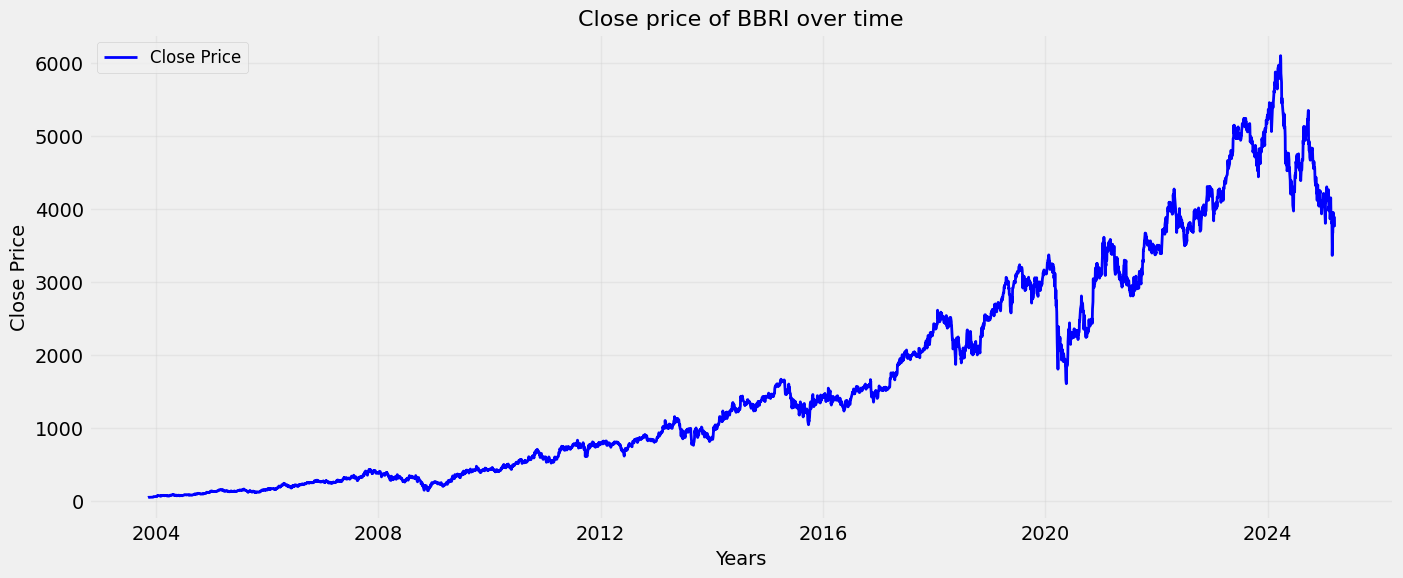

In [24]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of BBRI over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [25]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [26]:
df1 = pd.DataFrame(temp_data)

In [27]:
df1.rolling(window=5, min_periods=1).mean()

,0
0,10.0
1,15.0
2,20.0
3,25.0
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [28]:
for i in range(2003, 2025):
    print(i, list(stock_data.index.year).count(i))

2003 31
2004 255
2005 246
2006 251
2007 247
2008 238
2009 244
2010 245
2011 247
2012 246
2013 244
2014 244
2015 245
2016 241
2017 247
2018 249
2019 252
2020 242
2021 247
2022 246
2023 239
2024 237


In [29]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

C:\Users\richa\AppData\Local\Temp\ipykernel_12408\194502310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
C:\Users\richa\AppData\Local\Temp\ipykernel_12408\194502310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


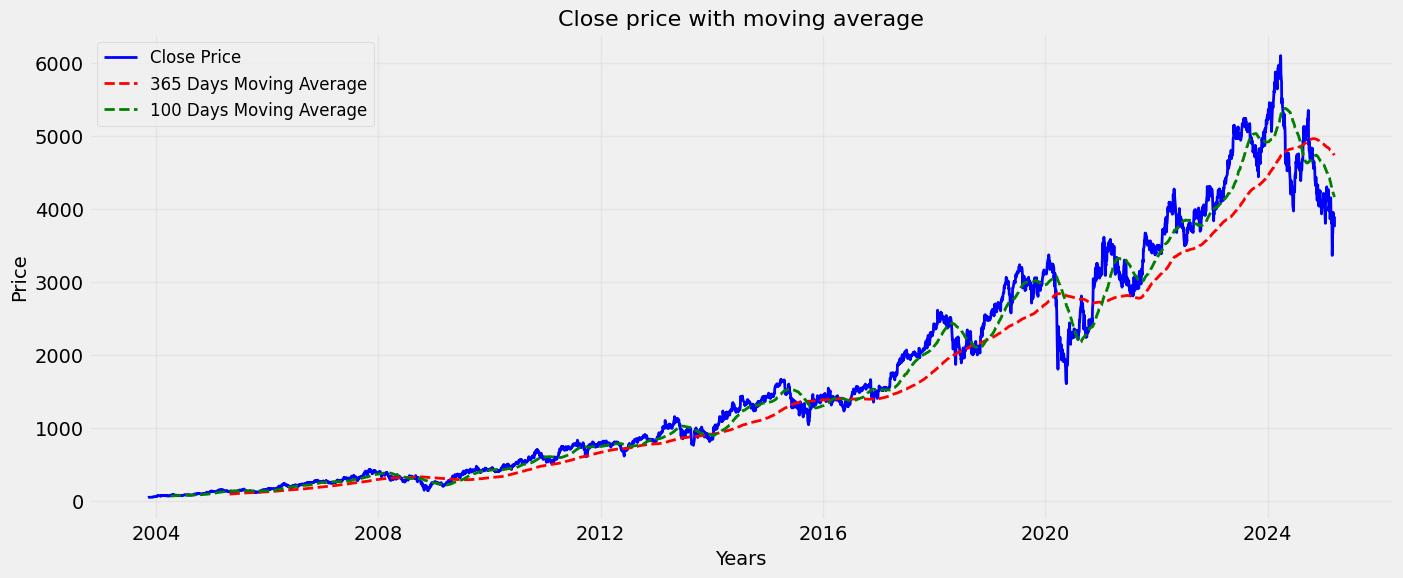

In [30]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

# Feature Scalling

Lalu melakukan feature scalling menggunakan minmaxscaler difit pada data train agar dapat digunakan kembali pada data test maupun data prediksi

In [31]:
# LSTM-> Long short term memory
# Skalakan data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [32]:
len(scaled_data)

5232

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [34]:
# Prepare data for lstm
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [35]:
# Split into train and test sets
train_size = int(len(x_data) * 0.8)# 80 train 20 test
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [36]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4105, 100, 1) (4105, 1)
(1027, 100, 1) (1027, 1)


# Arsitektur Model LSTM
LSTM (Long Short-Term Memory) adalah jenis arsitektur model yang digunakan dalam
teknik deep learning untuk memprediksi nilai-nilai masa depan dari suatu data



In [37]:
# Membuat model LSTM dengan 3 layer
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(64, return_sequences=True),  # Mengubah return_sequences menjadi True untuk layer kedua
    LSTM(32, return_sequences=False),  # Layer ketiga
    Dense(25),
    Dense(1)
])

# Kompilasi model 
model.compile(optimizer="adam", loss="mean_squared_error")

# Latih model 
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 25)                825       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 129235 (504.82 KB)
Trainable params: 129235 (504.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.fit(x_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50

411/411 [==============================] - 50s 106ms/step - loss: 4.8656e-04
Epoch 2/50
411/411 [==============================] - 43s 105ms/step - loss: 2.0555e-04
Epoch 3/50
411/411 [==============================] - 43s 104ms/step - loss: 1.4243e-04
Epoch 4/50
411/411 [==============================] - 43s 105ms/step - loss: 1.2296e-04
Epoch 5/50
411/411 [==============================] - 44s 106ms/step - loss: 1.0789e-04
Epoch 6/50
411/411 [==============================] - 44s 107ms/step - loss: 7.9929e-05
Epoch 7/50
411/411 [==============================] - 44s 107ms/step - loss: 7.1949e-05
Epoch 8/50
411/411 [==============================] - 43s 104ms/step - loss: 8.2168e-05
Epoch 9/50
411/411 [==============================] - 42s 101ms/step - loss: 7.4758e-05
Epoch 10/50
411/411 [==============================] - 42s 101ms/step - loss: 4.5605e-05
Epoch 11/50
411/411 [==============================] - 42s 103ms/step - loss: 4.9516e-05
Epoch 12/50
411/411 [========

# Melakukan Prediksi

Model dilatih untuk memprediksi harga saham BBRI berdasarkan data uji. Hasil prediksi kemudian diubah kembali ke skala aslinya menggunakan scaler. Selanjutnya, nilai RMSE dihitung untuk mengukur seberapa akurat model dalam memprediksi harga saham.

In [39]:
# Dapatkan nilai prediksi dari model 
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

33/33 [==============================] - 3s 49ms/step


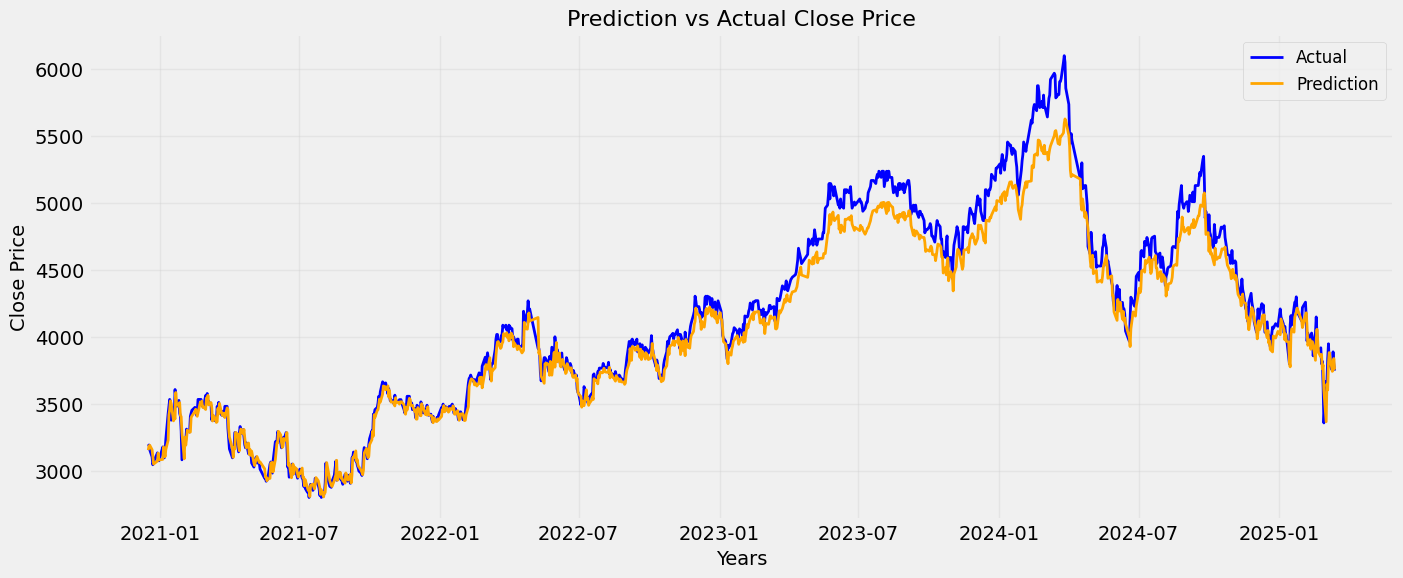

In [40]:
plotting_data = pd.DataFrame(
    {
        'Actual': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Actual'], label = 'Actual', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'orange',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [41]:
# Menghitung MAPE
mape= np.mean(np.abs((plotting_data['Prediction']-plotting_data['Actual'])/plotting_data['Actual']))*100

In [42]:
# Menampilkan hasil
print(f'MAPE: {mape:.4f}')

MAPE: 2.3740


In [43]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 [==============================] - 0s 37ms/step


In [44]:
future_predictions

[array([[3731.2048]], dtype=float32),
 array([[3702.0354]], dtype=float32),
 array([[3674.5642]], dtype=float32),
 array([[3649.4172]], dtype=float32),
 array([[3625.9053]], dtype=float32),
 array([[3603.8713]], dtype=float32),
 array([[3583.1335]], dtype=float32),
 array([[3563.5786]], dtype=float32),
 array([[3545.1333]], dtype=float32),
 array([[3527.7363]], dtype=float32)]

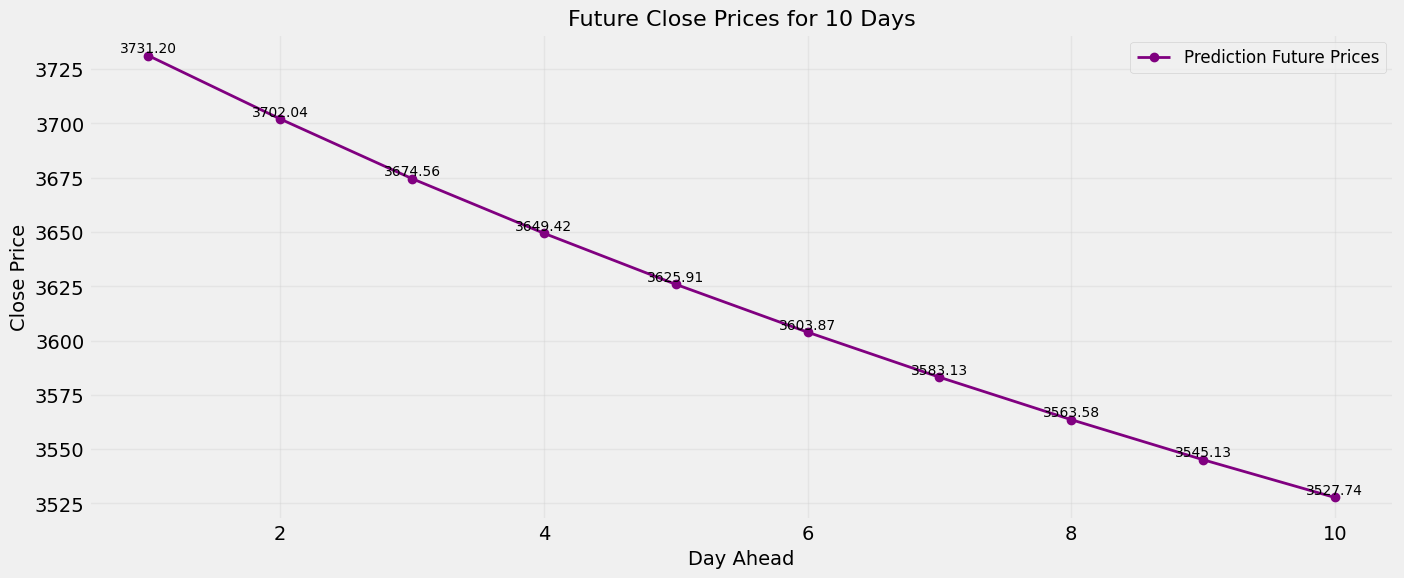

In [45]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()